In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_170.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_065.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_081.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_129.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_077.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_093.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_024.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_073.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_153.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_142.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_148.JPG
/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/rupee5_009.JPG
/kaggle/input/indian-coins-dataset/indian_coins_data

In [2]:
import numpy as np 
import tensorflow as tf 
import tensorflow.keras as keras 
import matplotlib.pyplot as plt 
import cv2 
import os 
import glob
from sklearn.metrics import classification_report,mean_squared_error,confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
one, two, five, ten = [], [], [], []

# Load rupee 1 coin images
for x in glob.iglob('/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_1/*.[jJ][pP][gG]'):  # Case-insensitive
    img = cv2.imread(x)
    if img is None:  # Handle missing/corrupt images
        print(f"Failed to load image: {x}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (480,480))
    one.append(img)

print(f"Number of rupee 1 images loaded: {len(one)}")


Number of rupee 1 images loaded: 194


In [4]:
for x in glob.iglob('/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_10/*.[jJ][pP][gG]'):  # Case-insensitive
    img = cv2.imread(x)
    if img is None:  # Handle missing/corrupt images
        print(f"Failed to load image: {x}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (480,480))
    ten.append(img)

print(f"Number of rupee 10 images loaded: {len(ten)}")

Number of rupee 10 images loaded: 74


In [5]:
for x in glob.iglob('/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_2/*.[jJ][pP][gG]'):  # Case-insensitive
    img = cv2.imread(x)
    if img is None:  # Handle missing/corrupt images
        print(f"Failed to load image: {x}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (480,480))
    two.append(img)

print(f"Number of rupee 2 images loaded: {len(two)}")

Number of rupee 2 images loaded: 197


In [6]:
for x in glob.iglob('/kaggle/input/indian-coins-dataset/indian_coins_dataset/rupee_5/*.[jJ][pP][gG]'):  # Case-insensitive
    img = cv2.imread(x)
    if img is None:  # Handle missing/corrupt images
        print(f"Failed to load image: {x}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (480,480))
    five.append(img)

print(f"Number of rupee 5 images loaded: {len(five)}")

Number of rupee 5 images loaded: 191


Text(0.5, 1.0, 'ten')

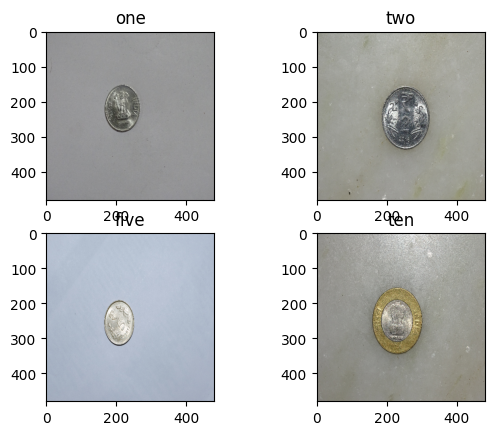

In [7]:
plt.subplot(221)
plt.imshow(one[54])
plt.title('one')
plt.subplot(222)
plt.imshow(two[54])
plt.title('two')
plt.subplot(223)
plt.imshow(five[54])
plt.title('five')
plt.subplot(224)
plt.imshow(ten[54])
plt.title('ten')

In [8]:
labels={"one":1,"two":2,"five":5,"ten":10}
one=np.array(one)
two=np.array(two)
five=np.array(five)
ten=np.array(ten)

Text(0.5, 1.0, 'ten')

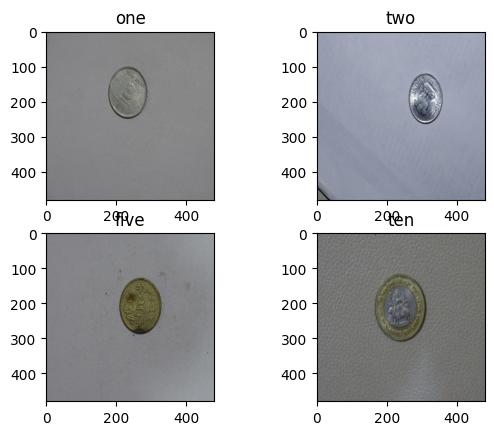

In [9]:
plt.subplot(221)
plt.imshow(one[45])
plt.title('one')
plt.subplot(222)
plt.imshow(two[45])
plt.title('two')
plt.subplot(223)
plt.imshow(five[45])
plt.title('five')
plt.subplot(224)
plt.imshow(ten[45])
plt.title('ten')

In [10]:
print(len(one))
print(len(two))
print(len(five))
print(len(ten))

194
197
191
74


In [11]:

one_label = np.ones(len(one))


two_label = np.full(len(two), 2)

five_label = np.full(len(five), 5)


ten_label = np.full(len(ten), 10)
print(ten_label[:6])


[10 10 10 10 10 10]


In [12]:
# Concatenating multiple arrays using a list
all_images = np.concatenate([one, two, five, ten], axis=0)
all_labels = np.concatenate([one_label, two_label, five_label, ten_label], axis=0)


In [13]:
print(len(one)+len(two)+len(five)+len(ten))
print(all_images.shape)

656
(656, 480, 480, 3)


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,mean_squared_error,confusion_matrix
import seaborn as sn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [15]:
all_images, all_labels = shuffle(all_images, all_labels, random_state=42)

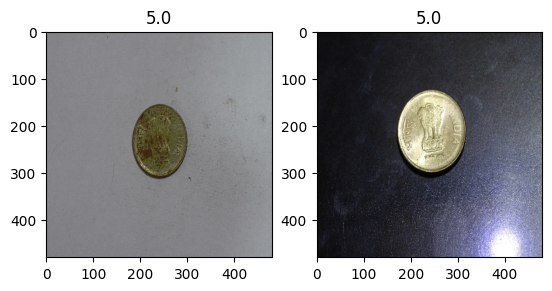

In [16]:
plt.subplot(121)
plt.imshow(all_images[50])
plt.title(all_labels[50])
plt.subplot(122)
plt.imshow(all_images[174])
plt.title(all_labels[174])
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

In [18]:
label_mapping = {1: 0, 2: 1, 5: 2, 10: 3}
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])


In [19]:
y_train = to_categorical(y_train, num_classes=4)  # Convert to one-hot
y_test = to_categorical(y_test, num_classes=4)  # Convert to one-hot

In [20]:
base_model = keras.applications.EfficientNetV2M(
    include_top=False,  # Exclude the original classification layer
    weights="imagenet",  # Pre-trained weights from ImageNet
    input_shape=(480,480, 3),  
)

# Freeze the base model layers
base_model.trainable = False

# Create the custom model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),  # Add another dropout
    keras.layers.Dense(4, activation='softmax')
])

214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [21]:



from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing
    zoom_range=0.3,  # Zoom
    horizontal_flip=True,  # Horizontal flipping
    fill_mode='nearest'  # Fill gaps with nearest pixels
)

# Fit the data generator to your training data
datagen.fit(X_train)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Use the generator to train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,  # Increase epochs for better results
    validation_data=(X_test, y_test)
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step - accuracy: 0.4022 - loss: 1.2564 - val_accuracy: 0.6515 - val_loss: 0.8713
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6682 - loss: 0.7665 - val_accuracy: 0.6515 - val_loss: 0.7406
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7876 - loss: 0.5872 - val_accuracy: 0.6894 - val_loss: 0.6612
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7615 - loss: 0.5516 - val_accuracy: 0.7803 - val_loss: 0.5553
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8071 - loss: 0.4438 - val_accuracy: 0.6970 - val_loss: 0.6393
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8097 - loss: 0.4250 - val_accuracy: 0.8409 - val_loss: 0.4164
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8588 - loss: 0.3586 - val_accuracy: 0.8485 - val_loss: 0.3949
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8442 - loss: 0.3615 - val_accuracy: 0.8182 - val_loss: 0.4004
Ep

In [22]:
# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, batch_size=32)

# Print the loss and accuracy
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1] * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 603ms/step - accuracy: 0.8667 - loss: 0.2954
Test Loss: 0.28148412704467773
Test Accuracy: 87.88%


In [23]:
predicted=model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step


In [24]:
mse=mean_squared_error(y_test,predicted)
print('Mean Square Error ',mse)
print("Root Mean Square Error ",np.sqrt(mse))


Mean Square Error  0.03994664037351469
Root Mean Square Error  0.19986655641581133


In [25]:
# Save the model
model.save('coin_detection_model.h5')
